<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C3W3_NLP_Reading_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [5]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
vocab_size = 10000
emdedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-12-26 14:52:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2020-12-26 14:52:28 (88.2 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [10]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

# data format: 
# {'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 
# 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 
# 'is_sarcastic': 0}

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [11]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [17]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, emdedding_dim, input_length=max_length),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(24, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                38424     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 198,449
Trainable params: 198,449
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.4808 - accuracy: 0.7401 - val_loss: 0.3222 - val_accuracy: 0.8639
Epoch 2/30
625/625 - 2s - loss: 0.2154 - accuracy: 0.9156 - val_loss: 0.3172 - val_accuracy: 0.8630
Epoch 3/30
625/625 - 2s - loss: 0.1208 - accuracy: 0.9603 - val_loss: 0.3444 - val_accuracy: 0.8645
Epoch 4/30
625/625 - 2s - loss: 0.0658 - accuracy: 0.9800 - val_loss: 0.4032 - val_accuracy: 0.8630
Epoch 5/30
625/625 - 2s - loss: 0.0331 - accuracy: 0.9923 - val_loss: 0.4607 - val_accuracy: 0.8580
Epoch 6/30
625/625 - 2s - loss: 0.0161 - accuracy: 0.9976 - val_loss: 0.5157 - val_accuracy: 0.8572
Epoch 7/30
625/625 - 2s - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.5623 - val_accuracy: 0.8553
Epoch 8/30
625/625 - 2s - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.6134 - val_accuracy: 0.8539
Epoch 9/30
625/625 - 2s - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.6573 - val_accuracy: 0.8526
Epoch 10/30
625/625 - 2s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.7066 - val_accuracy: 0.8535

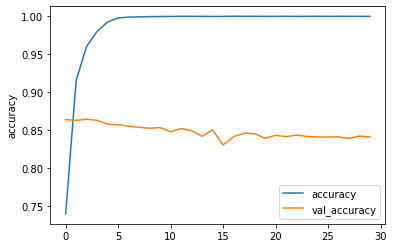

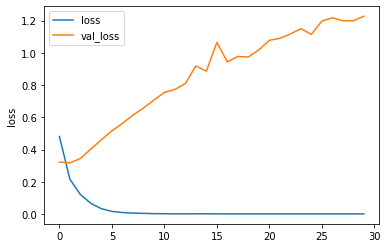

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel=("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
sentence = ["grandad starting to fear ghost in the house might be real", "friends season finale showing this weekend"]
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[7.26197277e-06]
 [4.38271974e-10]
 [9.99976158e-01]
 ...
 [1.38766145e-05]
 [1.06110907e-04]
 [1.38816222e-10]]
